# Acquire and Prep - Wrangle Exercises

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from env import get_db_url

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [2]:
query = '''SELECT parcelid, bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, yearbuilt, fips, taxvaluedollarcnt, taxamount, propertylandusetypeid, propertylandusedesc
	FROM properties_2017
		JOIN propertylandusetype USING (propertylandusetypeid)
    WHERE propertylandusedesc = 'Single Family Residential';'''

df = pd.read_sql(query, get_db_url('zillow'))

In [3]:
df

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid,propertylandusedesc
0,10759547,0.0,0.0,NaN,NaN,6037.0,27516.0,NaN,261.0,Single Family Residential
1,11193347,0.0,0.0,NaN,NaN,6037.0,10.0,NaN,261.0,Single Family Residential
2,11215747,0.0,0.0,NaN,NaN,6037.0,10.0,NaN,261.0,Single Family Residential
3,11229347,0.0,0.0,NaN,NaN,6037.0,2108.0,174.21,261.0,Single Family Residential
4,11324547,4.0,2.0,3633.0,2005.0,6037.0,296425.0,6941.39,261.0,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...
2152858,14356230,4.0,3.0,2262.0,2015.0,6059.0,960756.0,13494.52,261.0,Single Family Residential
2152859,14157725,4.0,4.5,3127.0,2014.0,6059.0,536061.0,6244.16,261.0,Single Family Residential
2152860,14356183,0.0,0.0,NaN,NaN,6059.0,208057.0,5783.88,261.0,Single Family Residential
2152861,14367624,3.0,2.5,1974.0,2015.0,6059.0,424353.0,5302.70,261.0,Single Family Residential


In [4]:
original_num_of_rows = df.shape[0]

2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

In [5]:
df.describe()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid
count,2.152863e+06,2.152852e+06,2.152852e+06,2.144379e+06,2.143526e+06,2.152863e+06,2.152370e+06,2.148421e+06,2152863.0
mean,1.309657e+07,3.287196e+00,2.230688e+00,1.862855e+03,1.960950e+03,6.048377e+03,4.618962e+05,5.634866e+03,261.0
std,5.171557e+06,9.547544e-01,9.992796e-01,1.222125e+03,2.216220e+01,2.043329e+01,6.996760e+05,8.178910e+03,0.0
min,1.071172e+07,0.000000e+00,0.000000e+00,1.000000e+00,1.801000e+03,6.037000e+03,1.000000e+00,1.850000e+00,261.0
25%,1.165907e+07,3.000000e+00,2.000000e+00,1.257000e+03,1.949000e+03,6.037000e+03,1.881702e+05,2.534980e+03,261.0
50%,1.259852e+07,3.000000e+00,2.000000e+00,1.623000e+03,1.958000e+03,6.037000e+03,3.276710e+05,4.108950e+03,261.0
75%,1.405609e+07,4.000000e+00,3.000000e+00,2.208000e+03,1.976000e+03,6.059000e+03,5.345270e+05,6.414320e+03,261.0
max,1.696019e+08,2.500000e+01,3.200000e+01,9.525760e+05,2.016000e+03,6.111000e+03,9.842891e+07,1.337756e+06,261.0


In [6]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2152863 non-null  int64  
 1   bedroomcnt                    2152852 non-null  float64
 2   bathroomcnt                   2152852 non-null  float64
 3   calculatedfinishedsquarefeet  2144379 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   fips                          2152863 non-null  float64
 6   taxvaluedollarcnt             2152370 non-null  float64
 7   taxamount                     2148421 non-null  float64
 8   propertylandusetypeid         2152863 non-null  float64
 9   propertylandusedesc           2152863 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 164.3+ MB


In [7]:
df.isnull().sum()

parcelid                           0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
yearbuilt                       9337
fips                               0
taxvaluedollarcnt                493
taxamount                       4442
propertylandusetypeid              0
propertylandusedesc                0
dtype: int64

- Lots and lots of nulls in every column except `parcelid`, `fips`, `propertylandusetypeid` and `propertylandusedesc`.
- For the excercises, `propertylandusetypeid` and `propertylandusedesc` are both unneccesary and can be dropped.
- However, it looks like all the `dtype` are fine.

### Solving the null values 

- `bedroomcnt` and `bathroomcnt` can be dropped because there are only 11 rows, and are not values that can be imputed
- other values can possibly be imputed, but the distributions need to be looked at first

#### Looking at `bedroomcnt`

Look at the null rows

In [8]:
df[df.bedroomcnt.isna()]

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid,propertylandusedesc
107763,79639557,NaN,NaN,NaN,1926.0,6059.0,67366.0,780.54,261.0,Single Family Residential
118612,79639558,NaN,NaN,NaN,1946.0,6059.0,43992.0,541.64,261.0,Single Family Residential
193993,79639565,NaN,NaN,1348.0,1952.0,6059.0,840698.0,NaN,261.0,Single Family Residential
1141339,76914853,NaN,NaN,200.0,NaN,6037.0,188972.0,NaN,261.0,Single Family Residential
1324608,76915070,NaN,NaN,990.0,1906.0,6037.0,435000.0,NaN,261.0,Single Family Residential
1442975,76916281,NaN,NaN,NaN,NaN,6037.0,273196.0,NaN,261.0,Single Family Residential
1647346,76915500,NaN,NaN,400.0,1954.0,6037.0,28347.0,NaN,261.0,Single Family Residential
1701026,76916105,NaN,NaN,NaN,1926.0,6037.0,407930.0,NaN,261.0,Single Family Residential
1722707,76914507,NaN,NaN,NaN,NaN,6037.0,477161.0,NaN,261.0,Single Family Residential
1776422,76915512,NaN,NaN,NaN,NaN,6037.0,38855.0,NaN,261.0,Single Family Residential


These can be dropped.  They are missing a lot of information anyways in other columns and are likely to be dropped anyways.

<AxesSubplot:>

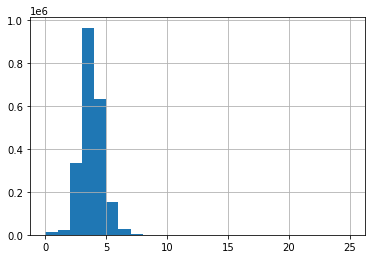

In [9]:
df.bedroomcnt.hist(bins=25)

In [10]:
df.bedroomcnt.value_counts()

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64

What are the houses with `bedroomcnt == 0`?

In [11]:
df[df.bedroomcnt == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13187 entries, 0 to 2152860
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      13187 non-null  int64  
 1   bedroomcnt                    13187 non-null  float64
 2   bathroomcnt                   13187 non-null  float64
 3   calculatedfinishedsquarefeet  4926 non-null   float64
 4   yearbuilt                     5106 non-null   float64
 5   fips                          13187 non-null  float64
 6   taxvaluedollarcnt             12803 non-null  float64
 7   taxamount                     11245 non-null  float64
 8   propertylandusetypeid         13187 non-null  float64
 9   propertylandusedesc           13187 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


These are most likely to be missing `calculatedfinishedsquarefeet` and `yearbuilt`.

In [12]:
df[df.bedroomcnt == 0].describe()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid
count,1.318700e+04,13187.0,13187.000000,4926.000000,5106.000000,13187.000000,1.280300e+04,1.124500e+04,13187.0
mean,1.986986e+07,0.0,0.128991,1174.879009,1951.683510,6055.711003,6.209315e+05,8.489532e+03,261.0
std,2.930287e+07,0.0,0.650117,2267.700998,26.157028,27.975772,2.399681e+06,3.511245e+04,0.0
min,1.071313e+07,0.0,0.000000,1.000000,1887.000000,6037.000000,1.000000e+00,1.850000e+00,261.0
25%,1.171067e+07,0.0,0.000000,360.000000,1929.000000,6037.000000,2.629650e+04,5.872200e+02,261.0
50%,1.270201e+07,0.0,0.000000,626.000000,1951.000000,6037.000000,1.103190e+05,1.915280e+03,261.0
75%,1.459117e+07,0.0,0.000000,1210.000000,1970.000000,6059.000000,3.858480e+05,5.655280e+03,261.0
max,1.681836e+08,0.0,20.000000,63692.000000,2016.000000,6111.000000,9.842891e+07,1.337756e+06,261.0


Looks like 0.75 of the rows also have no bathrooms.  In addition, they are very small homes.  I suspect that these are actually unknowns that were entered as `0.0`.

Consider the connection between `bedroomcnt == 0` and `bathroomcnt == 0`

In [13]:
df[(df.bedroomcnt == 0) & (df.bathroomcnt == 0)]

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid,propertylandusedesc
0,10759547,0.0,0.0,NaN,NaN,6037.0,27516.0,NaN,261.0,Single Family Residential
1,11193347,0.0,0.0,NaN,NaN,6037.0,10.0,NaN,261.0,Single Family Residential
2,11215747,0.0,0.0,NaN,NaN,6037.0,10.0,NaN,261.0,Single Family Residential
3,11229347,0.0,0.0,NaN,NaN,6037.0,2108.0,174.21,261.0,Single Family Residential
5,11457547,0.0,0.0,NaN,NaN,6037.0,124.0,NaN,261.0,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...
2152823,13889389,0.0,0.0,NaN,NaN,6059.0,2568893.0,27309.30,261.0,Single Family Residential
2152844,17204623,0.0,0.0,NaN,NaN,6111.0,92679.0,1090.16,261.0,Single Family Residential
2152854,11477607,0.0,0.0,NaN,NaN,6037.0,1198476.0,NaN,261.0,Single Family Residential
2152857,14359297,0.0,0.0,NaN,NaN,6059.0,1087111.0,19313.08,261.0,Single Family Residential


In [14]:
df[(df.bedroomcnt == 0) & (df.bathroomcnt == 0)].info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12088 entries, 0 to 2152860
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      12088 non-null  int64  
 1   bedroomcnt                    12088 non-null  float64
 2   bathroomcnt                   12088 non-null  float64
 3   calculatedfinishedsquarefeet  3833 non-null   float64
 4   yearbuilt                     4023 non-null   float64
 5   fips                          12088 non-null  float64
 6   taxvaluedollarcnt             11705 non-null  float64
 7   taxamount                     10174 non-null  float64
 8   propertylandusetypeid         12088 non-null  float64
 9   propertylandusedesc           12088 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 1.0+ MB


These are also missing a lot of data. So there is significant overlap between the two groups ($\approx 0.92$).

In [15]:
df[df.bedroomcnt == 0].shape[0]/df.shape[0]

0.0061253317094492315

These represent a very small number of the data.  I expect that they can be dropped.  This will also drop a lot of the nulls in other columns.

In [16]:
df[~(df.bedroomcnt.isnull()) & (df.bedroomcnt != 0)]

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid,propertylandusedesc
4,11324547,4.0,2.0,3633.0,2005.0,6037.0,296425.0,6941.39,261.0,Single Family Residential
6,11544747,3.0,4.0,1620.0,2011.0,6037.0,847770.0,10244.94,261.0,Single Family Residential
7,11585547,3.0,2.0,2077.0,1926.0,6037.0,646760.0,7924.68,261.0,Single Family Residential
18,12716947,3.0,1.0,1244.0,1950.0,6037.0,169471.0,2532.88,261.0,Single Family Residential
19,12757147,3.0,2.0,1300.0,1950.0,6037.0,233266.0,3110.99,261.0,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...
2152856,13027311,4.0,4.0,4375.0,2015.0,6037.0,422400.0,13877.56,261.0,Single Family Residential
2152858,14356230,4.0,3.0,2262.0,2015.0,6059.0,960756.0,13494.52,261.0,Single Family Residential
2152859,14157725,4.0,4.5,3127.0,2014.0,6059.0,536061.0,6244.16,261.0,Single Family Residential
2152861,14367624,3.0,2.5,1974.0,2015.0,6059.0,424353.0,5302.70,261.0,Single Family Residential


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   yearbuilt                     float64
 5   fips                          float64
 6   taxvaluedollarcnt             float64
 7   taxamount                     float64
 8   propertylandusetypeid         float64
 9   propertylandusedesc           object 
dtypes: float64(8), int64(1), object(1)
memory usage: 164.3+ MB


In [18]:
df.isnull().sum()

parcelid                           0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
yearbuilt                       9337
fips                               0
taxvaluedollarcnt                493
taxamount                       4442
propertylandusetypeid              0
propertylandusedesc                0
dtype: int64

There was a lot of overlap in the columns with nulls.

In [19]:
1 - (original_num_of_rows - df.shape[0])/original_num_of_rows

1.0

$0.9939$ of the data is retained.

#### Solving nulls in the `bathroomcnt`

Consider their distribution

In [20]:
df.bathroomcnt.describe()

count    2.152852e+06
mean     2.230688e+00
std      9.992796e-01
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.200000e+01
Name: bathroomcnt, dtype: float64

In [21]:
df.bathroomcnt.value_counts()

2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64

A house with $>10$ bathrooms is suspicious.  Take a look at these.

In [22]:
df[df.bathroomcnt > 10].describe()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid
count,3.540000e+02,354.000000,354.000000,354.000000,353.000000,354.000000,3.540000e+02,3.540000e+02,354.0
mean,1.241691e+07,7.641243,12.491525,14305.997175,1985.141643,6039.050847,1.197294e+07,1.394320e+05,261.0
std,8.320160e+06,2.740649,2.296058,6592.915212,28.562079,6.405355,1.288295e+07,1.523806e+05,0.0
min,1.073677e+07,0.000000,10.500000,10.000000,1912.000000,6037.000000,6.788700e+04,3.690800e+02,261.0
25%,1.164005e+07,7.000000,11.000000,10353.750000,1970.000000,6037.000000,4.089012e+06,4.673757e+04,261.0
50%,1.165495e+07,8.000000,12.000000,13184.000000,1997.000000,6037.000000,8.061433e+06,9.240656e+04,261.0
75%,1.198903e+07,9.000000,13.000000,17306.500000,2007.000000,6037.000000,1.492209e+07,1.736906e+05,261.0
max,1.676377e+08,25.000000,32.000000,52503.000000,2016.000000,6059.000000,9.018846e+07,1.078102e+06,261.0


In [23]:
df[df.bathroomcnt > 10]

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid,propertylandusedesc
3301,11679408,7.0,11.0,8272.0,2001.0,6037.0,4525353.0,52681.75,261.0,Single Family Residential
3312,11684258,7.0,11.0,11810.0,1980.0,6037.0,30166843.0,342940.38,261.0,Single Family Residential
13992,11645314,5.0,13.0,19335.0,1997.0,6037.0,10904781.0,131646.20,261.0,Single Family Residential
24679,11641881,8.0,11.0,10352.0,1939.0,6037.0,2977691.0,36085.16,261.0,Single Family Residential
26485,12325767,25.0,20.0,11700.0,2010.0,6037.0,1608491.0,19238.87,261.0,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...
2134701,11660050,8.0,12.0,16152.0,2009.0,6037.0,17000000.0,203513.62,261.0,Single Family Residential
2135273,11887283,10.0,19.0,31415.0,1991.0,6037.0,6401936.0,73571.72,261.0,Single Family Residential
2138637,12969868,10.0,16.0,19803.0,2000.0,6037.0,4197539.0,55454.21,261.0,Single Family Residential
2141564,13074473,10.0,11.0,20281.0,2001.0,6037.0,4073278.0,45903.84,261.0,Single Family Residential


<AxesSubplot:>

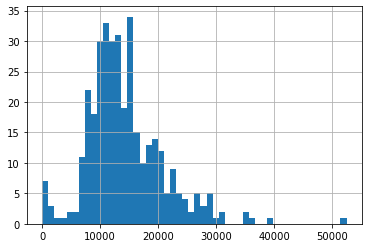

In [24]:
df[df.bathroomcnt > 10].calculatedfinishedsquarefeet.hist(bins=50)

<AxesSubplot:>

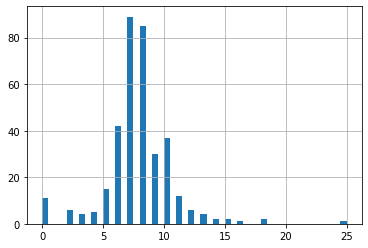

In [25]:
df[df.bathroomcnt > 10].bedroomcnt.hist(bins=50)

These are suspicious values.  They probably might be answered by investigating the rows with `bathroomcnt==0` and in exploring the data in `calculatedfinishedsquarefeet`.

In [26]:
df[df.bathroomcnt <= 0]

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid,propertylandusedesc
0,10759547,0.0,0.0,NaN,NaN,6037.0,27516.0,NaN,261.0,Single Family Residential
1,11193347,0.0,0.0,NaN,NaN,6037.0,10.0,NaN,261.0,Single Family Residential
2,11215747,0.0,0.0,NaN,NaN,6037.0,10.0,NaN,261.0,Single Family Residential
3,11229347,0.0,0.0,NaN,NaN,6037.0,2108.0,174.21,261.0,Single Family Residential
5,11457547,0.0,0.0,NaN,NaN,6037.0,124.0,NaN,261.0,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...
2152823,13889389,0.0,0.0,NaN,NaN,6059.0,2568893.0,27309.30,261.0,Single Family Residential
2152844,17204623,0.0,0.0,NaN,NaN,6111.0,92679.0,1090.16,261.0,Single Family Residential
2152854,11477607,0.0,0.0,NaN,NaN,6037.0,1198476.0,NaN,261.0,Single Family Residential
2152857,14359297,0.0,0.0,NaN,NaN,6059.0,1087111.0,19313.08,261.0,Single Family Residential


<AxesSubplot:>

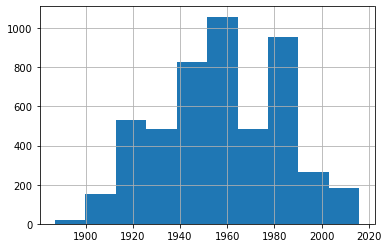

In [27]:
df[df.bathroomcnt <= 0].yearbuilt.hist()

In [28]:
df[df.bathroomcnt <= 0].describe()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid
count,1.302700e+04,13027.00000,13027.0,4767.000000,4960.000000,13027.000000,1.264200e+04,1.111200e+04,13027.0
mean,2.017200e+07,0.21916,0.0,1499.777848,1957.728226,6059.356490,6.282276e+05,8.542264e+03,261.0
std,2.935721e+07,0.87220,0.0,8009.850130,25.767460,30.046231,2.387811e+06,3.507197e+04,0.0
min,1.071313e+07,0.00000,0.0,1.000000,1887.000000,6037.000000,1.000000e+00,1.850000e+00,261.0
25%,1.173306e+07,0.00000,0.0,360.000000,1940.000000,6037.000000,2.586000e+04,5.722900e+02,261.0
50%,1.305051e+07,0.00000,0.0,757.000000,1956.000000,6037.000000,1.172790e+05,1.977730e+03,261.0
75%,1.706175e+07,0.00000,0.0,1614.500000,1980.000000,6059.000000,4.360372e+05,6.122365e+03,261.0
max,1.681836e+08,18.00000,0.0,531118.000000,2016.000000,6111.000000,9.842891e+07,1.337756e+06,261.0


I'm thinking drop these rows as mistakes in the data.  I can understand that some very early houses might not have indoor plumbing, but houses after the 1950s would surely have indoor plumbing.  I also suspect that a lot of the houses without bathrooms (or few) would be small in square footage.

[Source](https://www.meyerscompaniesinc.com/blog/2021/march/when-was-indoor-plumbing-brought-to-the-united-s/): "By the mid-1930s, lawmakers and medical professionals in the United States recognized that sanitary plumbing was essential for public health. In response, the U.S. created hygienic guidelines and plumbing codes to help streamline the hygienic system installation process throughout the country. In the 1940s, due to restrictions on iron, steel, and copper, American manufacturers introduced cast iron and plastics to the world of plumbing, which are the materials we most often find in toilets today. "

In [29]:
df[(df.bathroomcnt <= 0) & (df.calculatedfinishedsquarefeet <=1500)].describe()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid
count,3.489000e+03,3489.000000,3489.0,3489.000000,3245.000000,3489.000000,3.487000e+03,3347.000000,3489.0
mean,1.308870e+07,0.181714,0.0,588.773574,1952.547612,6042.484093,1.508569e+05,1942.102779,261.0
std,9.459837e+06,0.622770,0.0,382.696029,23.718797,17.982721,3.828909e+05,4392.154834,0.0
min,1.071313e+07,0.000000,0.0,1.000000,1890.000000,6037.000000,4.000000e+00,6.340000,261.0
25%,1.137520e+07,0.000000,0.0,256.000000,1935.000000,6037.000000,1.346900e+04,319.560000,261.0
50%,1.200608e+07,0.000000,0.0,470.000000,1953.000000,6037.000000,4.802000e+04,801.270000,261.0
75%,1.256096e+07,0.000000,0.0,875.000000,1968.000000,6037.000000,1.654690e+05,2207.315000,261.0
max,1.676892e+08,6.000000,0.0,1500.000000,2014.000000,6111.000000,7.207407e+06,82241.030000,261.0


Looks like most (0.75) of them were built before 1959. 

Likely, these rows could be simply dropped.  THey are a small proportion of the data (only $\approx 930$ out of $>2$ million rows).  In addition, they seem unlikely to lead to a realistic prediction; it seems that *most* buyers probably would want indoor plumbing.

*But* I am not going to drop them until exploring the `calculatedfinishedsquarefeet`.

#### Solving the null values for `calculatedfinishedsquarefeet`

In [30]:
df.calculatedfinishedsquarefeet.describe()

count    2.144379e+06
mean     1.862855e+03
std      1.222125e+03
min      1.000000e+00
25%      1.257000e+03
50%      1.623000e+03
75%      2.208000e+03
max      9.525760e+05
Name: calculatedfinishedsquarefeet, dtype: float64

What is with the min?  Houses with only one square foot?

In [31]:
df[df.calculatedfinishedsquarefeet < 100]

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid,propertylandusedesc
3956,11952248,0.0,0.0,99.0,1940.0,6037.0,36593.0,542.00,261.0,Single Family Residential
32077,11524206,0.0,0.0,60.0,2005.0,6037.0,11534.0,186.12,261.0,Single Family Residential
39196,12898264,0.0,1.0,78.0,2009.0,6037.0,52991.0,866.12,261.0,Single Family Residential
53614,11524201,0.0,0.0,20.0,2005.0,6037.0,1124.0,62.05,261.0,Single Family Residential
58438,12186499,2.0,1.0,1.0,1907.0,6037.0,121376.0,1996.35,261.0,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...
2055863,11524197,0.0,0.0,20.0,2005.0,6037.0,1126.0,62.08,261.0,Single Family Residential
2088114,11524182,0.0,0.0,20.0,2005.0,6037.0,7246.0,135.02,261.0,Single Family Residential
2098808,11524211,0.0,0.0,60.0,2005.0,6037.0,5763.0,117.34,261.0,Single Family Residential
2098812,11524196,0.0,0.0,20.0,2005.0,6037.0,2875.0,82.92,261.0,Single Family Residential


This is very suspecious data.  It seems that some houses have 1 $\text{ft}^2$ but three bedrooms and two baths.  Are these ant houses?  Digging a little deeper: consider houses under 1000 $\text{ft}^2$, and their distribution of bedrooms and bathrooms.

In [32]:
df[df.calculatedfinishedsquarefeet < 1001].describe()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid
count,1.892070e+05,189204.000000,189204.000000,189207.000000,188831.00000,189207.000000,1.891640e+05,188406.000000,189207.0
mean,1.260974e+07,2.065749,1.056796,840.460268,1941.50129,6042.090689,2.267367e+05,2956.035916,261.0
std,4.296093e+06,0.609591,0.315038,135.184572,16.17373,14.960176,2.193143e+05,2498.398291,0.0
min,1.071304e+07,0.000000,0.000000,1.000000,1812.00000,6037.000000,4.000000e+00,6.340000,261.0
25%,1.180382e+07,2.000000,1.000000,780.000000,1926.00000,6037.000000,1.087750e+05,1595.645000,261.0
50%,1.228400e+07,2.000000,1.000000,868.000000,1946.00000,6037.000000,1.934805e+05,2592.510000,261.0
75%,1.279655e+07,2.000000,1.000000,942.000000,1951.00000,6037.000000,2.950000e+05,3792.627500,261.0
max,1.681760e+08,7.000000,20.000000,1000.000000,2015.00000,6111.000000,2.253855e+07,255975.040000,261.0


In [33]:
df[df.calculatedfinishedsquarefeet < 1001].bedroomcnt.value_counts()

2.0    130376
3.0     36207
1.0     18581
0.0      3325
4.0       684
5.0        29
6.0         1
7.0         1
Name: bedroomcnt, dtype: int64

In [34]:
df[df.calculatedfinishedsquarefeet < 1001].bathroomcnt.value_counts()

1.0     172307
2.0      11933
0.0       2871
1.5       1826
3.0        165
7.5         38
2.5         24
0.5         13
4.0          9
5.0          6
3.5          5
20.0         2
16.0         2
18.0         1
7.0          1
11.0         1
Name: bathroomcnt, dtype: int64

<Figure size 720x720 with 0 Axes>

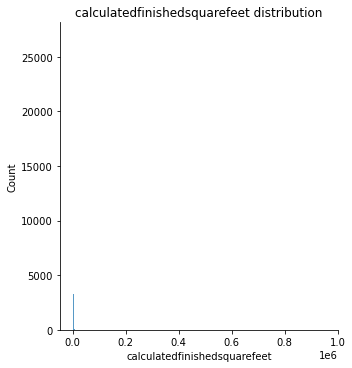

In [35]:
plt.figure(figsize=(10, 10))
sns.displot(data=df, x = 'calculatedfinishedsquarefeet')
plt.title('calculatedfinishedsquarefeet distribution')
plt.show()

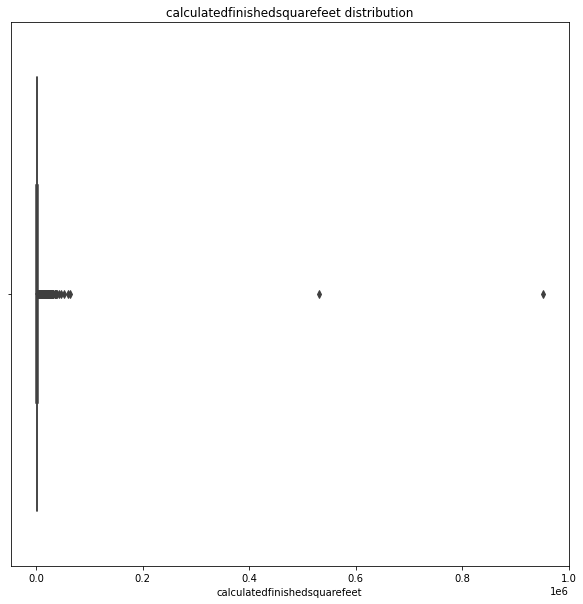

In [36]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x = 'calculatedfinishedsquarefeet')
plt.title('calculatedfinishedsquarefeet distribution')
plt.show()

In [37]:
df.calculatedfinishedsquarefeet.describe()

count    2.144379e+06
mean     1.862855e+03
std      1.222125e+03
min      1.000000e+00
25%      1.257000e+03
50%      1.623000e+03
75%      2.208000e+03
max      9.525760e+05
Name: calculatedfinishedsquarefeet, dtype: float64

There are a lot of outliers.  They need to be excluded in order to see the graph better.  Include only data that is within $2\sigma$ of the mean. 

In [38]:
#get stats
mean_sqft = df.calculatedfinishedsquarefeet.mean()
std_sqft = df.calculatedfinishedsquarefeet.std()
median_sqft = df.calculatedfinishedsquarefeet.median()
mean_sqft, std_sqft, median_sqft

(1862.855177652831, 1222.125123637998, 1623.0)

In [39]:
sigma_multiplier = 2
# get the df subset
sqft_nooutliers = df[(df.calculatedfinishedsquarefeet <= mean_sqft + std_sqft*sigma_multiplier) & (df.calculatedfinishedsquarefeet >= mean_sqft - std_sqft*sigma_multiplier)]

In [40]:
sqft_nooutliers.calculatedfinishedsquarefeet.describe()

count    2.095519e+06
mean     1.771460e+03
std      7.157328e+02
min      1.000000e+00
25%      1.249000e+03
50%      1.604000e+03
75%      2.152000e+03
max      4.307000e+03
Name: calculatedfinishedsquarefeet, dtype: float64

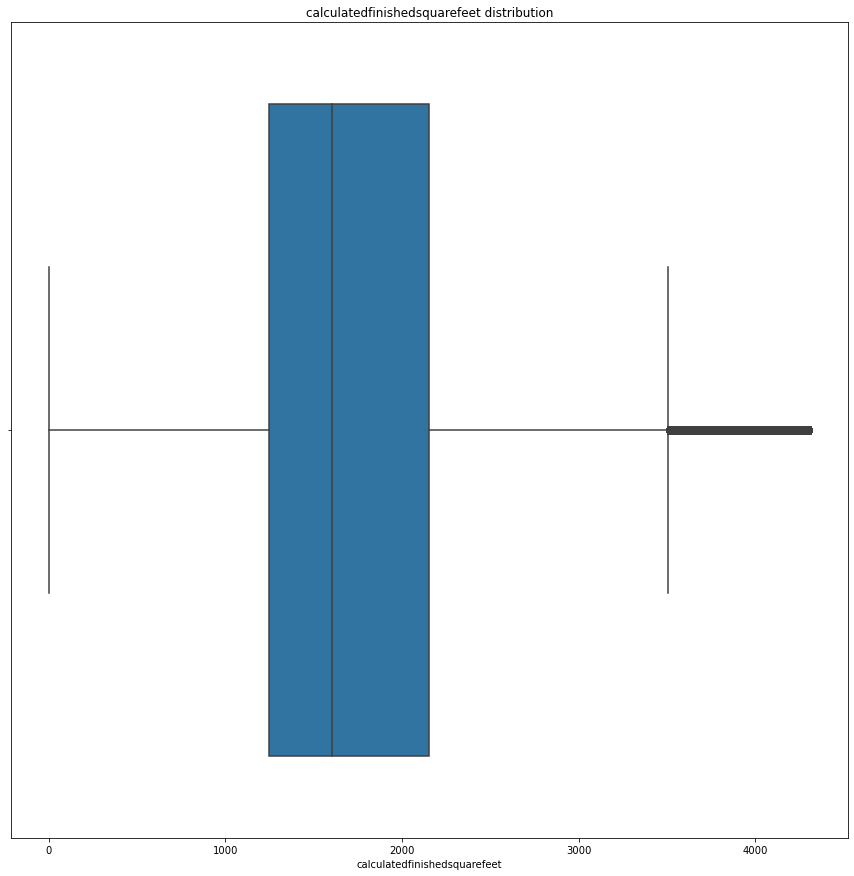

In [41]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=sqft_nooutliers, x = 'calculatedfinishedsquarefeet')
plt.title('calculatedfinishedsquarefeet distribution')
plt.show()

<Figure size 1080x1080 with 0 Axes>

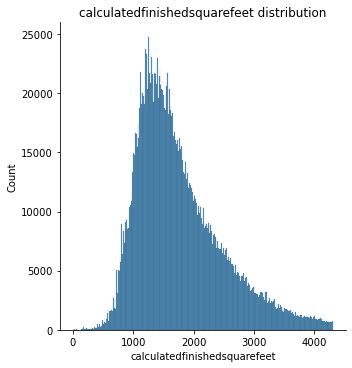

In [42]:
plt.figure(figsize=(15, 15))
sns.displot(data=sqft_nooutliers, x = 'calculatedfinishedsquarefeet')
plt.title('calculatedfinishedsquarefeet distribution')
plt.show()

It looks like the data is positively skewed.  In this case, it makes the most sense to impute the median in this case because it is a best measure of the center of the data.  However, the rows could be dropped, which does not lead to a large loss of data, but I want to get practice using python to impute data.  Alternatively, we could simply drop all the houses with less than 100 square feet.  Although, this is probably being cautious in terms of keeping rows.

[Source](https://worldpopulationreview.com/state-rankings/minimum-house-size-by-state): Alaska has the smallest required square footage at 100 square feet.

In [43]:
# impute_sqft = SimpleImputer(strategy='median')
# impute_sqft = impute_sqft.fit(df[['calculatedfinishedsquarefeet']])
# df[['calculatedfinishedsquarefeet']] = impute_sqft.transform(df[['calculatedfinishedsquarefeet']])

In [44]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2152863 non-null  int64  
 1   bedroomcnt                    2152852 non-null  float64
 2   bathroomcnt                   2152852 non-null  float64
 3   calculatedfinishedsquarefeet  2144379 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   fips                          2152863 non-null  float64
 6   taxvaluedollarcnt             2152370 non-null  float64
 7   taxamount                     2148421 non-null  float64
 8   propertylandusetypeid         2152863 non-null  float64
 9   propertylandusedesc           2152863 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 164.3+ MB


#### Solving the null values for `yearbuilt`

In [45]:
df.yearbuilt.describe()

count    2.143526e+06
mean     1.960950e+03
std      2.216220e+01
min      1.801000e+03
25%      1.949000e+03
50%      1.958000e+03
75%      1.976000e+03
max      2.016000e+03
Name: yearbuilt, dtype: float64

In [46]:
df.yearbuilt.mode()

0    1955.0
dtype: float64

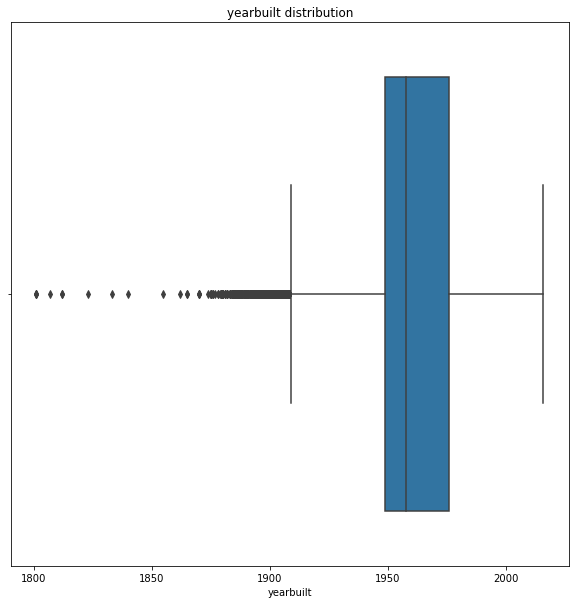

In [47]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x = 'yearbuilt')
plt.title('yearbuilt distribution')
plt.show()

<Figure size 720x720 with 0 Axes>

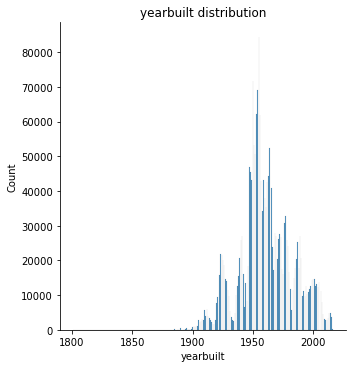

In [48]:
plt.figure(figsize=(10, 10))
sns.displot(data=df, x = 'yearbuilt')
plt.title('yearbuilt distribution')
plt.show()

The data looks normally distributed (mean, median and mode are all similar), but with a slight negative skew.  All the outliers are on the low end.  Here, it makes the most sense to use the mean to impute the value.  It is slightly higher than the mean and mode because of the skew; however, because the data is on houses, more of the housing stock will be newer than younger.

In [49]:
# impute_year = SimpleImputer(strategy='mean')
# impute_year = impute_sqft.fit(df[['yearbuilt']])
# df[['yearbuilt']] = impute_year.transform(df[['yearbuilt']])

In [50]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2152863 non-null  int64  
 1   bedroomcnt                    2152852 non-null  float64
 2   bathroomcnt                   2152852 non-null  float64
 3   calculatedfinishedsquarefeet  2144379 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   fips                          2152863 non-null  float64
 6   taxvaluedollarcnt             2152370 non-null  float64
 7   taxamount                     2148421 non-null  float64
 8   propertylandusetypeid         2152863 non-null  float64
 9   propertylandusedesc           2152863 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 164.3+ MB


#### Solving the null values for `taxvaluedollarcnt`

In [51]:
df.taxvaluedollarcnt.describe()

count    2.152370e+06
mean     4.618962e+05
std      6.996760e+05
min      1.000000e+00
25%      1.881702e+05
50%      3.276710e+05
75%      5.345270e+05
max      9.842891e+07
Name: taxvaluedollarcnt, dtype: float64

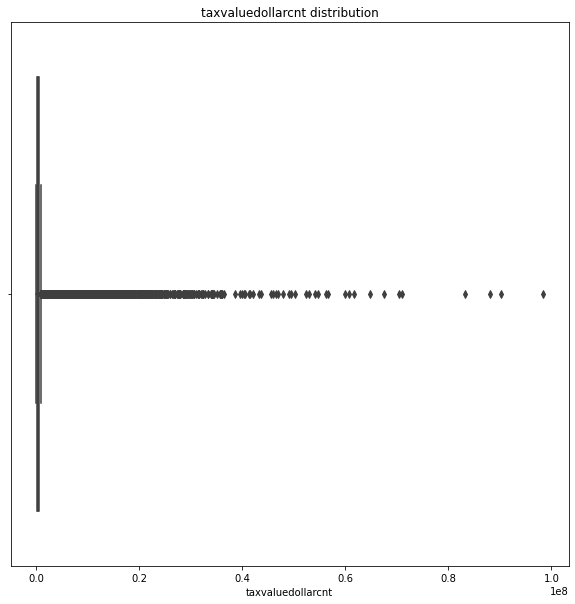

In [52]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x = 'taxvaluedollarcnt')
plt.title('taxvaluedollarcnt distribution')
plt.show()

Lots of outliers. Use the same technique as `calculatedfinishedsquarefeet` to visualize.

In [53]:
#get stats
mean_taxcnt = df.taxvaluedollarcnt.mean()
std_taxcnt = df.taxvaluedollarcnt.std()
mean_taxcnt, std_taxcnt

(461896.2379628038, 699676.0495996708)

In [54]:
sigma_multiplier = 2
# get the df subset
taxvalue_nooutliers = df[(df.taxvaluedollarcnt <= mean_taxcnt + std_taxcnt*sigma_multiplier) & (df.taxvaluedollarcnt >= mean_taxcnt - std_taxcnt*sigma_multiplier)]

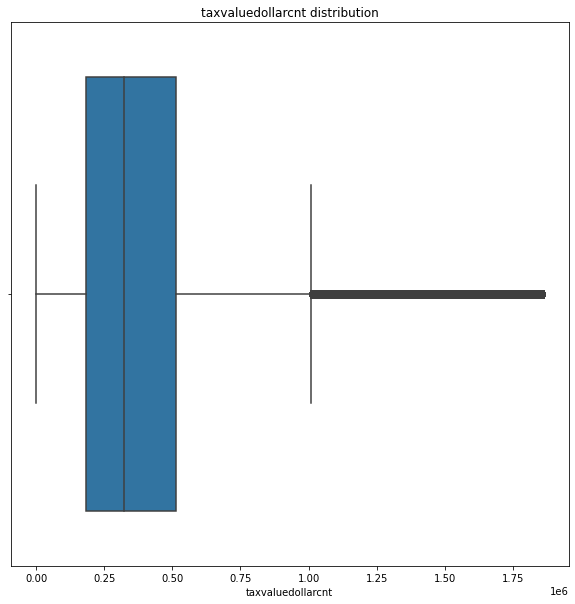

In [55]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=taxvalue_nooutliers, x = 'taxvaluedollarcnt')
plt.title('taxvaluedollarcnt distribution')
plt.show()

<Figure size 720x720 with 0 Axes>

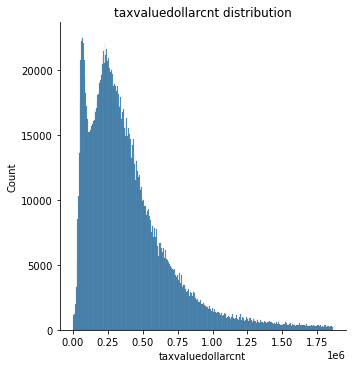

In [56]:
plt.figure(figsize=(10, 10))
sns.displot(data=taxvalue_nooutliers, x = 'taxvaluedollarcnt')
plt.title('taxvaluedollarcnt distribution')
plt.show()

This has two peaks.  Effectively bi-modal.  However, this represents the tax assesment on the parcel, similar to `taxamount`. Most likely these two columns will have some effect on property values. Therefore, imputing the values may have a stronger effect on the outcome than other variables. Therefore, if there is no data, they can be dropped.

#### Solving the null values for `taxamount`

In [57]:
df.taxamount.describe()

count    2.148421e+06
mean     5.634866e+03
std      8.178910e+03
min      1.850000e+00
25%      2.534980e+03
50%      4.108950e+03
75%      6.414320e+03
max      1.337756e+06
Name: taxamount, dtype: float64

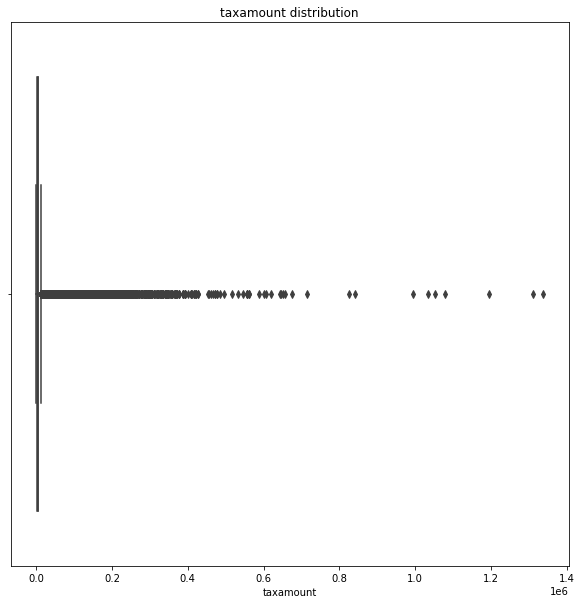

In [58]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x = 'taxamount')
plt.title('taxamount distribution')
plt.show()

Lots of outliers. Use the same technique as `calculatedfinishedsquarefeet` to visualize.

In [59]:
#get stats
mean_taxamt = df.taxamount.mean()
std_taxamt = df.taxamount.std()
mean_taxamt, std_taxamt

(5634.865977846398, 8178.910248585026)

In [60]:
sigma_multiplier = 2
# get the df subset
taxamt_nooutliers = df[(df.taxamount <= mean_taxamt + std_taxamt*sigma_multiplier) & (df.taxamount >= mean_taxamt - std_taxamt*sigma_multiplier)]

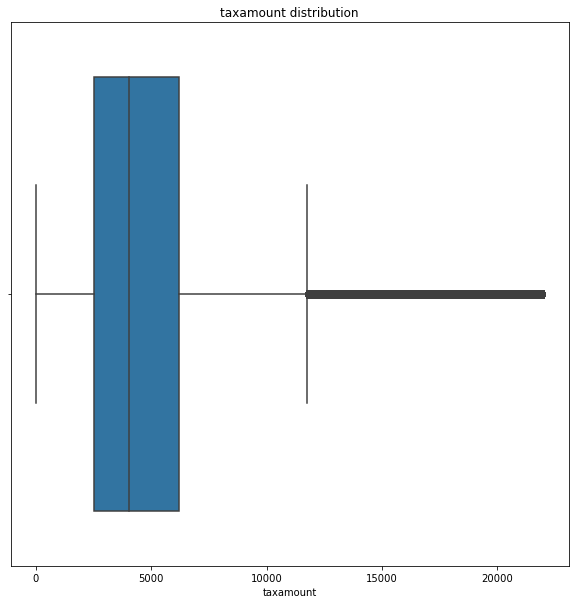

In [61]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=taxamt_nooutliers, x = 'taxamount')
plt.title('taxamount distribution')
plt.show()

<Figure size 720x720 with 0 Axes>

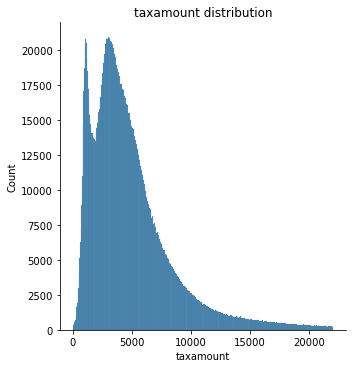

In [62]:
plt.figure(figsize=(10, 10))
sns.displot(data=taxamt_nooutliers, x = 'taxamount')
plt.title('taxamount distribution')
plt.show()

Similar to `taxvaluedollarcnt` this is appears effectively bimodal.

#### Sovling nulls discussion

- `bedroomcnt` and `bathroomcnt` null rows are dropped.  There are only 11,
- `calculatedfinishedsquarefeet` and `yearbuilt` could be imputed.

But a lot of the data is very strange and so I think the following are to be dropped
- Any row with a null
- Any row with `bedroomcount` $<1 \wedge$ `bathroomcnt` $<1 \wedge$ `calculatedfinishedsquarefeet` $< 150$ 

### Droping the null rows

Get info on the cleaned dataframe.

In [63]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2152863 non-null  int64  
 1   bedroomcnt                    2152852 non-null  float64
 2   bathroomcnt                   2152852 non-null  float64
 3   calculatedfinishedsquarefeet  2144379 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   fips                          2152863 non-null  float64
 6   taxvaluedollarcnt             2152370 non-null  float64
 7   taxamount                     2148421 non-null  float64
 8   propertylandusetypeid         2152863 non-null  float64
 9   propertylandusedesc           2152863 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 164.3+ MB


In [64]:
df.isnull().sum()

parcelid                           0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
yearbuilt                       9337
fips                               0
taxvaluedollarcnt                493
taxamount                       4442
propertylandusetypeid              0
propertylandusedesc                0
dtype: int64

In [65]:
df = df.dropna()
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2140235 non-null  int64  
 1   bedroomcnt                    2140235 non-null  float64
 2   bathroomcnt                   2140235 non-null  float64
 3   calculatedfinishedsquarefeet  2140235 non-null  float64
 4   yearbuilt                     2140235 non-null  float64
 5   fips                          2140235 non-null  float64
 6   taxvaluedollarcnt             2140235 non-null  float64
 7   taxamount                     2140235 non-null  float64
 8   propertylandusetypeid         2140235 non-null  float64
 9   propertylandusedesc           2140235 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 179.6+ MB


In [66]:
df.isnull().sum()

parcelid                        0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
yearbuilt                       0
fips                            0
taxvaluedollarcnt               0
taxamount                       0
propertylandusetypeid           0
propertylandusedesc             0
dtype: int64

In [67]:
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & (df.calculatedfinishedsquarefeet > 149)]

In [68]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134879 entries, 4 to 2152862
Data columns (total 10 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2134879 non-null  int64  
 1   bedroomcnt                    2134879 non-null  float64
 2   bathroomcnt                   2134879 non-null  float64
 3   calculatedfinishedsquarefeet  2134879 non-null  float64
 4   yearbuilt                     2134879 non-null  float64
 5   fips                          2134879 non-null  float64
 6   taxvaluedollarcnt             2134879 non-null  float64
 7   taxamount                     2134879 non-null  float64
 8   propertylandusetypeid         2134879 non-null  float64
 9   propertylandusedesc           2134879 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 179.2+ MB


In [71]:
1 - (original_num_of_rows - df.shape[0])/original_num_of_rows

0.9916464726273804

99.16% of the data is retained.

## Test `wrangle.py`

In [74]:
import wrangle

In [75]:
wrangle.wrangle_zillow_data()

Querying database ... 
Got data from the SQL database
Saved dataframe as a .csv!


,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,taxvaluedollarcnt,taxamount,propertylandusetypeid,propertylandusedesc
4,11324547,4.0,2.0,3633.0,2005.0,6037.0,296425.0,6941.39,261.0,Single Family Residential
6,11544747,3.0,4.0,1620.0,2011.0,6037.0,847770.0,10244.94,261.0,Single Family Residential
7,11585547,3.0,2.0,2077.0,1926.0,6037.0,646760.0,7924.68,261.0,Single Family Residential
18,12716947,3.0,1.0,1244.0,1950.0,6037.0,169471.0,2532.88,261.0,Single Family Residential
19,12757147,3.0,2.0,1300.0,1950.0,6037.0,233266.0,3110.99,261.0,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...
2152856,13027311,4.0,4.0,4375.0,2015.0,6037.0,422400.0,13877.56,261.0,Single Family Residential
2152858,14356230,4.0,3.0,2262.0,2015.0,6059.0,960756.0,13494.52,261.0,Single Family Residential
2152859,14157725,4.0,4.5,3127.0,2014.0,6059.0,536061.0,6244.16,261.0,Single Family Residential
2152861,14367624,3.0,2.5,1974.0,2015.0,6059.0,424353.0,5302.70,261.0,Single Family Residential
